 Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individuals


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [9]:
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
salary_test = pd.read_csv('SalaryData_Test(1).csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
salary_test['education'].value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [13]:
salary_test['educationno'].value_counts()

9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64

In [14]:
salary_test.drop('education',axis=1,inplace=True)
salary_train.drop('education',axis=1,inplace=True)

In [15]:
salary_test['workclass'].value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [16]:
salary_test['native'].nunique()

40

<AxesSubplot:xlabel='sex', ylabel='Count'>

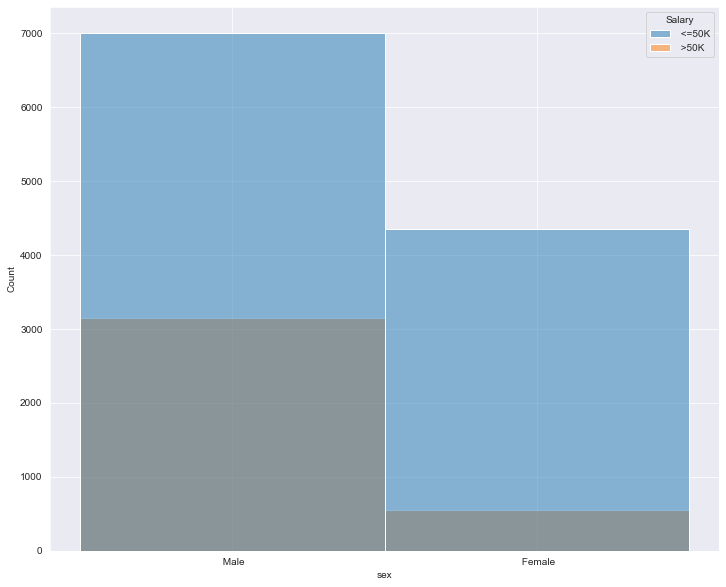

In [17]:
plt.figure(figsize=(12,10))
sns.histplot(x='sex',hue = 'Salary',data = salary_test,stat='count')

<AxesSubplot:xlabel='race', ylabel='Count'>

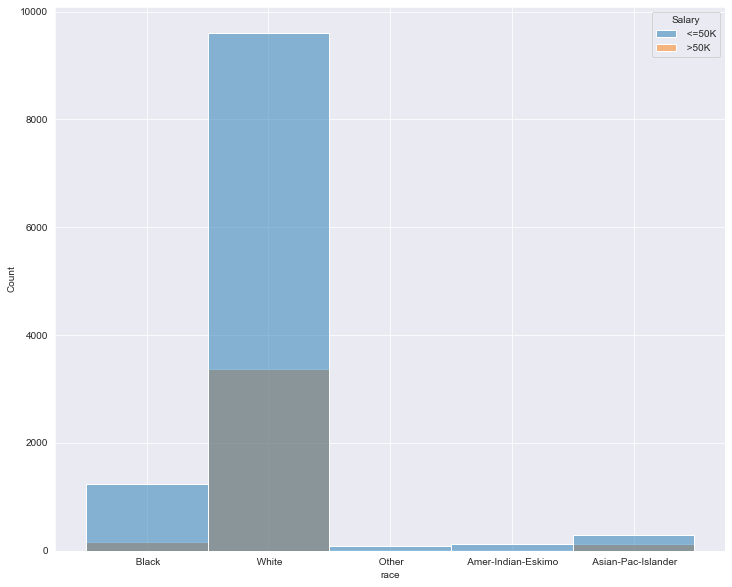

In [18]:
plt.figure(figsize=(12,10))
sns.histplot(x='race',hue = 'Salary',data = salary_test,stat='count')

<AxesSubplot:xlabel='maritalstatus', ylabel='Count'>

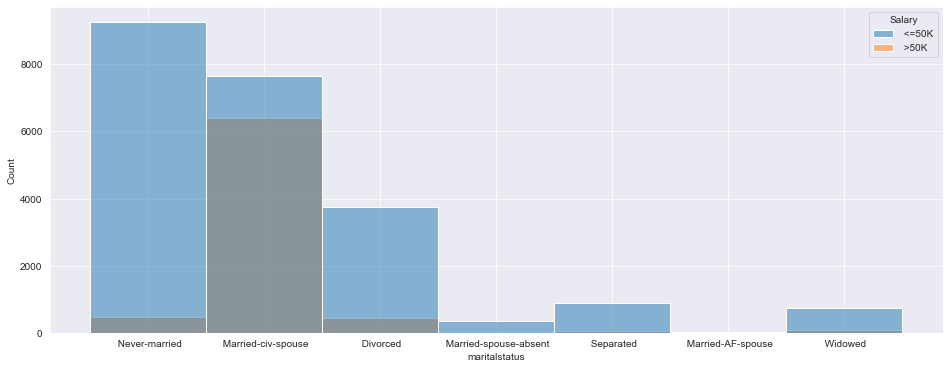

In [19]:
plt.figure(figsize=(16,6))
sns.histplot(x= 'maritalstatus',hue='Salary',data =salary_train,stat='count')

In [20]:
le = LabelEncoder()

In [21]:
encode = ['workclass','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [22]:
for i in encode:
    salary_test[i] = le.fit_transform(salary_test[i])
    salary_train[i]=le.fit_transform(salary_train[i])

In [23]:
salary_test

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,13,0,0,3,1,1,5455,0,40,37,0


In [24]:
X_samp = salary_test.sample(500)
X_samp

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
5679,56,4,10,2,4,0,4,1,0,0,50,37,0
5618,48,2,14,2,9,0,4,1,0,0,35,37,1
1177,42,4,10,2,4,0,4,1,0,0,70,37,0
7951,21,2,10,0,11,1,4,0,0,0,40,37,0
6905,50,2,9,4,3,1,4,1,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,18,2,10,4,7,3,4,1,0,0,20,37,0
4596,28,2,12,4,0,3,4,1,0,0,35,37,0
12102,45,2,14,4,3,1,4,0,0,2824,50,37,1
854,34,2,10,2,11,0,4,1,0,0,50,37,0


In [25]:
y_samp = X_samp.iloc[:,12:]
y_samp

,Salary
5679,0
5618,1
1177,0
7951,0
6905,0
...,...
44,0
4596,0
12102,1
854,0


In [26]:
X_samp.drop('Salary',axis =1,inplace=True)

In [27]:
X_samp

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
5679,56,4,10,2,4,0,4,1,0,0,50,37
5618,48,2,14,2,9,0,4,1,0,0,35,37
1177,42,4,10,2,4,0,4,1,0,0,70,37
7951,21,2,10,0,11,1,4,0,0,0,40,37
6905,50,2,9,4,3,1,4,1,0,0,40,37
...,...,...,...,...,...,...,...,...,...,...,...,...
44,18,2,10,4,7,3,4,1,0,0,20,37
4596,28,2,12,4,0,3,4,1,0,0,35,37
12102,45,2,14,4,3,1,4,0,0,2824,50,37
854,34,2,10,2,11,0,4,1,0,0,50,37


In [28]:
clf = SVC() 

In [29]:
param = [{'kernel':['rbf'],'C':[1,10,50,100],'gamma':[1,0.1,0.001,0.0001]}]


In [30]:
grid = GridSearchCV(clf,param_grid=param,verbose=True)

In [31]:
grid.fit(X_samp,y_samp)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100],
                          'gamma': [1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=True)

In [32]:
grid.best_params_,grid.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.85)

In [33]:
X_train = salary_train.iloc[:,:12]
X_train

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,1,4,1,2174,0,40,37
1,50,4,13,2,3,0,4,1,0,0,13,37
2,38,2,9,0,5,1,4,1,0,0,40,37
3,53,2,7,2,5,0,2,1,0,0,40,37
4,28,2,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,5,4,0,0,0,38,37
30157,40,2,9,2,6,0,4,1,0,0,40,37
30158,58,2,9,6,0,4,4,0,0,0,40,37
30159,22,2,9,4,0,3,4,1,0,0,20,37


In [34]:
y_train = salary_train.iloc[:,12:]
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [35]:
X_test = salary_test.iloc[:,:12]
X_test

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,7,4,6,3,2,1,0,0,40,37
1,38,2,9,2,4,0,4,1,0,0,50,37
2,28,1,12,2,10,0,4,1,0,0,40,37
3,44,2,10,2,6,0,2,1,7688,0,40,37
4,34,2,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,4,1,0,0,40,37
15056,39,2,13,0,9,1,4,0,0,0,36,37
15057,38,2,13,2,9,0,4,1,0,0,50,37
15058,44,2,13,0,0,3,1,1,5455,0,40,37


In [36]:
y_test = salary_test.iloc[:,12:]
y_test

,Salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [37]:
final = SVC(C= 10, gamma= 0.001, kernel= 'rbf')
final.fit(X_train,y_train)

SVC(C=10, gamma=0.001)

In [38]:
preds = final.predict(X_test)

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     11360
           1       0.83      0.50      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.84      0.73      0.76     15060
weighted avg       0.85      0.85      0.84     15060



In [40]:
print(confusion_matrix(y_test,preds))

[[10983   377]
 [ 1860  1840]]


In [41]:
accuracy_score(y_test,preds)

0.851460823373174